In [1]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import os

In /home/alexander/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alexander/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alexander/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/alexander/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alexander/.local/lib/python3.6/site-packages/matplo

In [2]:
btcusd = pd.read_csv('/media/alexander/AMR CHAMPER/FInBigData/archive/btcusd.csv')
ethusd = pd.read_csv('/media/alexander/AMR CHAMPER/FInBigData/archive/ethusd.csv')
ltcusd = pd.read_csv('/media/alexander/AMR CHAMPER/FInBigData/archive/ltcusd.csv')
xrpusd = pd.read_csv('/media/alexander/AMR CHAMPER/FInBigData/archive/xrpusd.csv')
linkusd = pd.read_csv('/media/alexander/AMR CHAMPER/FInBigData/archive/linkusd.csv')

,Unnamed: 0,time,open,close,high,low,volume


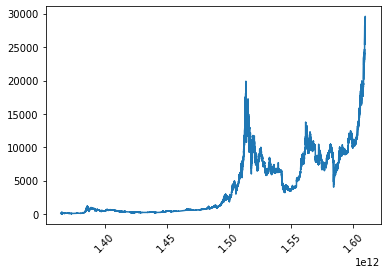

In [4]:
plt.plot(btcusd.time, btcusd.close)
plt.xticks(rotation=45)
plt.show()

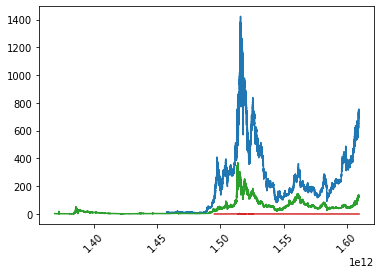

In [5]:
plt.plot(ethusd.time, ethusd.close)
plt.plot(linkusd.time, linkusd.close)
plt.plot(ltcusd.time, ltcusd.close)
plt.plot(xrpusd.time, xrpusd.close)
plt.xticks(rotation=45)
plt.show()

In [4]:
allCurrencyPairs = os.listdir('/media/alexander/AMR CHAMPER/FInBigData/archive/')

In [7]:
allCurrencyPairs

['aaabbb.csv',
 'absusd.csv',
 'adabtc.csv',
 'adausd.csv',
 'adaust.csv',
 'agiusd.csv',
 'aiousd.csv',
 'algbtc.csv',
 'algusd.csv',
 'algust.csv',
 'ampbtc.csv',
 'ampf0ustf0.csv',
 'ampusd.csv',
 'ampust.csv',
 'antbtc.csv',
 'anteth.csv',
 'antusd.csv',
 'astusd.csv',
 'atobtc.csv',
 'atoeth.csv',
 'atousd.csv',
 'aucusd.csv',
 'avaxusd.csv',
 'avaxust.csv',
 'avtusd.csv',
 'b21xusd.csv',
 'b21xust.csv',
 'balusd.csv',
 'balust.csv',
 'bandusd.csv',
 'bandust.csv',
 'batbtc.csv',
 'bateth.csv',
 'batusd.csv',
 'bchabcusd.csv',
 'bchnusd.csv',
 'bftusd.csv',
 'bntusd.csv',
 'boxusd.csv',
 'bsvbtc.csv',
 'bsvusd.csv',
 'btccnht.csv',
 'btcdomf0ustf0.csv',
 'btceur.csv',
 'btcf0ustf0.csv',
 'btcgbp.csv',
 'btcjpy.csv',
 'btcusd.csv',
 'btcust.csv',
 'btcxch.csv',
 'btgbtc.csv',
 'btgusd.csv',
 'btseusd.csv',
 'bttusd.csv',
 'cbtusd.csv',
 'chzusd.csv',
 'chzust.csv',
 'clousd.csv',
 'cndusd.csv',
 'cnhcnht.csv',
 'cnnusd.csv',
 'compusd.csv',
 'compust.csv',
 'ctxusd.csv',
 'daibtc.c

In [5]:
universe = pd.DataFrame(columns={'fileName', 'coinTag', 'pairedCurr', 'parquetFile'}, index=range(len(allCurrencyPairs)))
universe['fileName'] = allCurrencyPairs
for i in range(len(allCurrencyPairs)):
    universe.loc[i, 'pairedCurr'] = allCurrencyPairs[i][-7:-4]
    universe.loc[i, 'coinTag'] = allCurrencyPairs[i][0:-7]
    universe.loc[i, 'parquetFile'] = allCurrencyPairs[i][0:-4] + '.gzip' 

In [6]:
universe

,parquetFile,fileName,coinTag,pairedCurr
0,aaabbb.gzip,aaabbb.csv,aaa,bbb
1,absusd.gzip,absusd.csv,abs,usd
2,adabtc.gzip,adabtc.csv,ada,btc
3,adausd.gzip,adausd.csv,ada,usd
4,adaust.gzip,adaust.csv,ada,ust
...,...,...,...,...
316,zecusd.gzip,zecusd.csv,zec,usd
317,zilusd.gzip,zilusd.csv,zil,usd
318,zrxbtc.gzip,zrxbtc.csv,zrx,btc
319,zrxeth.gzip,zrxeth.csv,zrx,eth


In [11]:

#for i in range(len(universe)):
    #tempData = pd.read_csv('/media/alexander/AMR CHAMPER/FInBigData/archive/'+ universe.loc[i,'fileName'])
    #tempData.to_parquet('/media/alexander/AMR CHAMPER/FInBigData/parquet/' + universe.loc[i, 'fileName'][:-4] + '.gzip', compression='gzip') 
    


In [9]:

universe['coefVariation'] = 0
universe['meanC'] = 0
universe['stdDevC'] = 0
universe['meanVol'] = 0
for i in range(len(universe)):
    tempData = pd.read_parquet('/media/alexander/AMR CHAMPER/FInBigData/parquet/'+ universe.loc[i,'parquetFile'])
    tempMean = tempData.close.mean()
    tempStd = tempData.close.std()
    universe.loc[i, 'meanC'] = tempMean
    universe.loc[i, 'stdDevC'] = tempStd
    universe.loc[i, 'meanVol'] = tempData.volume.mean()
    universe.loc[i, 'coefVariation'] = tempStd / tempMean
    if (i % 10==0):
        print(i)
    

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320


In [24]:
universeUsd = universe[universe['pairedCurr']=='usd']
universeUsd[universeUsd['coefVariation']>2]
universeUsd.to_csv('universeUsd.csv')

In [21]:
topCoins = ['btc', 'eth', 'ltc', 'xlm', 'dot', 'ada', 'ust', 'xrp']
universeUsd[universeUsd['coinTag'].isin(topCoins)].meanVol.mean()

8033.747292372138

In [16]:
universe[universe['coinTag']=='dot']

,parquetFile,fileName,coinTag,pairedCurr,coefVariation,meanC,stdDevC,meanVol
77,dotusd.gzip,dotusd.csv,dot,usd,0.187772,5.015611,0.941792,416.190461
78,dotust.gzip,dotust.csv,dot,ust,0.205226,5.022715,1.030794,190.608283


In [19]:
def convertTime(dataframe):
    dataframe.time = dataframe.time.apply(lambda x: dt.datetime.fromtimestamp(x/1000)).strftime("%Y-%m-%d %H:%M:%S")
    return dataframe

'2013-04-02 11:36:00'

KeyboardInterrupt: 

0         1970-01-01 00:22:48.976980
1         1970-01-01 00:22:48.980160
2         1970-01-01 00:22:48.980940
3         1970-01-01 00:22:49.223280
4         1970-01-01 00:22:49.251120
                     ...            
1818994   1970-01-01 00:26:49.513380
1818995   1970-01-01 00:26:49.513440
1818996   1970-01-01 00:26:49.513500
1818997   1970-01-01 00:26:49.513560
1818998   1970-01-01 00:26:49.513620
Name: time, Length: 1818999, dtype: datetime64[ns]

In [40]:
ethusd = pd.read_csv('/media/alexander/AMR CHAMPER/FInBigData/archive/ethusd.csv')
ethusd.time = ethusd.time.apply(lambda x: dt.datetime.fromtimestamp(x/1000))
#ethusd['time'] = pd.Timestamp.fromtimestamp(ethusd['time']/1000)
#ethusd['time'] = pd.to_datetime(ethusd['time'], format="%Y-%m-%d %H:%M:%S")

In [57]:
ethusd

,time,open,close,high,low,volume
0,2016-03-09 17:04:00,10.297,10.097000,10.297000,10.097,0.030000
1,2016-03-09 18:49:00,11.197,11.197000,11.197000,11.197,0.010000
2,2016-03-09 19:56:00,11.097,11.097000,11.097000,11.097,0.020000
3,2016-03-09 21:16:00,11.195,11.195000,11.195000,11.195,0.010000
4,2016-03-09 21:21:00,10.870,10.870000,10.870000,10.870,1.000000
...,...,...,...,...,...,...
1934394,2021-01-01 16:05:00,736.710,737.456195,737.456195,736.650,28.902815
1934395,2021-01-01 16:06:00,738.110,738.110000,738.110000,738.110,0.087260
1934396,2021-01-01 16:07:00,738.110,737.500000,738.110000,737.500,267.558532
1934397,2021-01-01 16:08:00,737.370,737.520000,737.520000,737.370,7.550000


In [63]:
tempHigh

Timestamp('2016-03-09 19:17:20')

In [72]:
inputDataset = []

In [67]:
window = 600
tempLow = ethusd.loc[3].time
tempMid = tempLow + datetime.timedelta(0,window)
tempHigh = tempLow + datetime.timedelta(0,window*2)


In [73]:
inputDataset.append(ethusd[ethusd.time.between(tempLow, tempHigh, inclusive=True)])

In [154]:
def cutTargets(dataframe, window = 600, decRange = 0.025):
    tempLow = dataframe.loc[0].time
    killTime = dataframe.iloc[-1].time
    inputDataset = []
    targetDataset = []
    labels = []
    highLow = []
    i = 0
    while (i < 1):
        tempMid = tempLow + datetime.timedelta(0,window)
        tempHigh = tempMid + datetime.timedelta(0,window*2)
        if(tempHigh > killTime):
            break
        tempInput = dataframe[dataframe.time.between(tempLow, tempMid, inclusive=True)]
        if not tempInput.empty:
            tempTarget = dataframe[dataframe.time.between(tempMid, tempHigh, inclusive=True)]
            if not tempTarget.empty:
                inputDataset.append(tempInput)
                targetDataset.append(tempTarget)
                tempLow = tempMid
                openVal = tempInput.iloc[-1].close
                highVal = openVal + (openVal * decRange)
                lowVal = openVal - (openVal * decRange)
                if (max(tempTarget.high) > highVal):
                    labels.append(1)
                    highLow.append('high')
                elif (min(tempTarget.low) < lowVal):
                    labels.append(1)
                    highLow.append('low')
                else:
                    labels.append(0)
        else:
            tempLow = tempHigh
                
        
    return inputDataset, targetDataset

In [155]:
inp, tar = cutTargets(ethusd, window = 600)
tar

KeyboardInterrupt: 

In [150]:
openVal = tar[3].iloc[0].open
decRange = 0.001
highVal = openVal + (openVal * decRange)
lowVal = openVal - (openVal * decRange)
if (max(tar[3].high) > highVal):
    print('here')
elif (min(tar[3].low) < lowVal):
    print('there')



here


In [122]:
btcusd.loc[-1:]

,time,open,close,high,low,volume
0,1364774820000,93.250000,93.3000,93.30,93.250000,93.300000
1,1364774880000,100.000000,100.0000,100.00,100.000000,93.300000
2,1364774940000,93.300000,93.3000,93.30,93.300000,33.676862
3,1364775060000,93.350000,93.4700,93.47,93.350000,20.000000
4,1364775120000,93.470000,93.4700,93.47,93.470000,2.021627
...,...,...,...,...,...,...
3147684,1609513500000,29309.000000,29352.0000,29352.00,29309.000000,1.727491
3147685,1609513560000,29352.478686,29363.6385,29368.00,29352.478686,0.030000
3147686,1609513620000,29367.000000,29357.0000,29367.00,29355.000000,0.412022
3147687,1609513680000,29357.000000,29367.0000,29367.00,29357.000000,1.671204


In [130]:
ethusd.iloc[-1].time

Timestamp('2021-01-01 16:09:00')

KeyError: 0

In [121]:

tempHigh = killTime + datetime.timedelta(0,600*2)
if(tempHigh > killTime):
    print('here')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().